In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = pd.read_csv("../../datasets/toxic_comments_2.csv",nrows=4000)

In [3]:
dataset.head(6)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...


In [12]:
labels = pd.read_csv("../../datasets/labels.csv",nrows=4000)

In [5]:
import nltk
from nltk.corpus import stopwords
labels = labels[["id","toxic"]]

In [53]:
labels["toxic"] = labels["toxic"].replace(-1,1)

In [54]:
labels["toxic"].value_counts()

1    2522
0    1478
Name: toxic, dtype: int64

In [8]:
corpus = []
dataset["comment_text"] = dataset["comment_text"].str.replace("\n"," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("@"," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("=="," ")
for i in range(0,4000):
    words = re.sub('[^a-zA-Z]',' ',dataset["comment_text"][i])
    words = words.lower().split()
    words = [word for word in words if not word in set(stopwords.words("english"))]
    sentence = ' '.join(words)
    corpus.append(sentence)

In [9]:
len(corpus)

4000

In [56]:
cv = CountVectorizer()
y = labels["toxic"].values
X_train,X_test,y_train,y_test = train_test_split(corpus,y,test_size=0.2,random_state=0) #800 test samples
cv.fit(X_train)
X_train = cv.transform(X_train).toarray() #create sparse matrix 
X_test = cv.transform(X_test).toarray()

In [58]:
from sklearn.ensemble import IsolationForest
classifier = IsolationForest()
classifier.fit(X_train,y_train)

IsolationForest()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [61]:
accuracy = accuracy_score(np.array(y_test),np.array(y_pred))


In [62]:
precision = precision_score(np.array(y_test),np.array(y_pred),average='weighted')

c:\users\fawaz\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
f1_score = f1_score(np.array(y_test),np.array(y_pred),average='weighted')
recall_score = recall_score(np.array(y_test),np.array(y_pred),average='weighted')

In [64]:
metrics = {"accuracy":accuracy,"precision":precision,"f1_score":f1_score,"recall":recall_score}

In [65]:
for metric in metrics:
    print(metric.title() + " is ",metrics[metric])

Accuracy is  0.61125
Precision is  0.3736265625
F1_Score is  0.46377230411171444
Recall is  0.61125


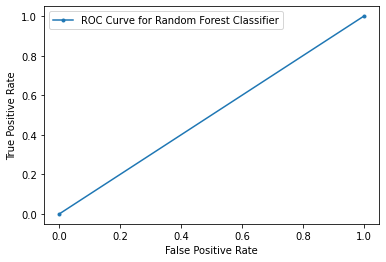

In [67]:
from sklearn.metrics import roc_curve
fp,tp,treshold = roc_curve(np.array(y_test),np.array(y_pred))
plt.plot(fp,tp,marker = '.',label='ROC Curve for Random Forest Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [70]:
#isolation forest is used for anomaly detection/ outlier detection